In [582]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
from shapely.geometry import Polygon
from shapely.geometry import Point,Polygon
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3
#!pip install geopy
# !pip install fiona
import fiona
import seaborn as sns

In [583]:
# Path to my File Geodatabase
gdb_path = '/Users/kd6801/Desktop/HI_map/HI_Structures.gdb'

# List all layers in the File Geodatabase
layers = fiona.listlayers(gdb_path)

# Read a specific layer into a GeoDataFrame
gdf = gpd.read_file(gdb_path, layer=layers[0])

In [807]:
fiona.listlayers(gdb_path)
# There is only one layer

['HI_Structures']

In [808]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 374703 entries, 0 to 374702
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   BUILD_ID      374703 non-null  int64         
 1   OCC_CLS       374703 non-null  object        
 2   PRIM_OCC      374703 non-null  object        
 3   SEC_OCC       0 non-null       object        
 4   PROP_ADDR     0 non-null       object        
 5   PROP_CITY     0 non-null       object        
 6   PROP_ST       374703 non-null  object        
 7   PROP_ZIP      0 non-null       object        
 8   OUTBLDG       0 non-null       object        
 9   HEIGHT        160128 non-null  float64       
 10  SQMETERS      374703 non-null  float64       
 11  SQFEET        374703 non-null  float64       
 12  H_ADJ_ELEV    0 non-null       object        
 13  L_ADJ_ELEV    0 non-null       object        
 14  FIPS          374703 non-null  object        
 15  CENSUSCOD

In [809]:
layers

['HI_Structures']

In [810]:
#gdf.plot()

In [811]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [812]:
gdf.iloc[0]

BUILD_ID                                                   915439
OCC_CLS                                              Unclassified
PRIM_OCC                                             Unclassified
SEC_OCC                                                      None
PROP_ADDR                                                    None
PROP_CITY                                                    None
PROP_ST                                                    Hawaii
PROP_ZIP                                                     None
OUTBLDG                                                      None
HEIGHT                                                        NaN
SQMETERS                                                201.55426
SQFEET                                                 2169.51001
H_ADJ_ELEV                                                   None
L_ADJ_ELEV                                                   None
FIPS                                                        15007
CENSUSCODE

## Now, we want to conduct spatial joins in geopandas

In [813]:
file_path_all = '/Users/kd6801/Desktop/Hilo_API/Hilo_all.json'
Hilo_api = pd.read_json(file_path_all)

In [814]:
Hilo_api.head()

,id,formattedAddress,addressLine1,addressLine2,city,state,zipCode,county,latitude,longitude,...,zoning,features,taxAssessments,propertyTaxes,owner,ownerOccupied,lastSaleDate,lastSalePrice,bathrooms,bedrooms
0,"189-Kukuau-St,-Unit-100,-Hilo,-HI-96720","189 Kukuau St, Unit 100, Hilo, HI 96720",189 Kukuau St,Unit 100,Hilo,HI,96720,Hawaii,19.718335,-155.085895,...,3A,{'architectureType': 'Condo / Apartment'},"{'2018': {'value': 566500, 'land': 169900, 'im...",{'2017': {'total': 3515}},"{'names': ['KUKUAU COTTAGE LLC'], 'mailingAddr...",1.0,NaN,NaN,NaN,NaN
1,"55-Kukuau-St,-Hilo,-HI-96720","55 Kukuau St, Hilo, HI 96720",55 Kukuau St,None,Hilo,HI,96720,Hawaii,19.719859,-155.083936,...,3A,"{'exteriorType': 'Metal', 'floorCount': 3, 'un...","{'2020': {'value': 193000, 'land': 84000, 'imp...",{'2020': {'total': 2065}},"{'names': ['RICK BARBATI'], 'mailingAddress': ...",0.0,2017-05-17T00:00:00.000Z,175000.0,NaN,NaN
2,"98-Ponahawai-St,-Hilo,-HI-96720","98 Ponahawai St, Hilo, HI 96720",98 Ponahawai St,None,Hilo,HI,96720,Hawaii,19.722039,-155.084752,...,"3Z - RESORT-HOTEL,HEIGHT","{'exteriorType': 'Wood', 'floorCount': 2, 'uni...","{'2020': {'value': 273900, 'land': 103300, 'im...",{'2020': {'total': 2931}},"{'names': ['GABRIEL P RAMIREZ'], 'mailingAddre...",0.0,1998-09-29T00:00:00.000Z,160000.0,NaN,NaN
3,"552-Kinoole-St,-Hilo,-HI-96720","552 Kinoole St, Hilo, HI 96720",552 Kinoole St,None,Hilo,HI,96720,Hawaii,19.719338,-155.085549,...,3A,"{'exteriorType': 'Wood', 'floorCount': 1, 'uni...","{'2020': {'value': 153300, 'land': 112400, 'im...",{'2020': {'total': 1640}},"{'names': ['CLYDE T TRST MIYAMURA'], 'mailingA...",0.0,NaN,NaN,NaN,NaN
4,"110-Ponahawai-St,-Hilo,-HI-96720","110 Ponahawai St, Hilo, HI 96720",110 Ponahawai St,None,Hilo,HI,96720,Hawaii,19.721838,-155.084829,...,3Z,"{'exteriorType': 'Wood', 'floorCount': 2, 'uni...","{'2020': {'value': 302500, 'land': 99000, 'imp...",{'2020': {'total': 3237}},"{'names': ['TAKAI PROPERTIES LLC'], 'mailingAd...",0.0,2005-06-14T00:00:00.000Z,1000.0,NaN,NaN


In [815]:
type(Hilo_api)

pandas.core.frame.DataFrame

In [816]:
#Hilo_api.iloc[0]
# We want to create a geometry column like this, because we have the longitude and latitude.
Hilo_api['geometry'] = Hilo_api.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

In [817]:
# Conver Pandas dataframe into GeoDataFrame
gdf_api = gpd.GeoDataFrame(Hilo_api, geometry='geometry')

In [818]:
# Ensure both geodataframes have the same coordinate reference system (CRS)
# The gdf_api previously does not have CRS set.
gdf_api.set_crs('EPSG:4326',inplace=True)
print(gdf_api.crs==gdf.crs)

True


In [819]:
joined = gpd.sjoin(gdf_api, gdf, how="inner", op='intersects')

/Users/kd6801/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [820]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 374703 entries, 0 to 374702
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   BUILD_ID      374703 non-null  int64         
 1   OCC_CLS       374703 non-null  object        
 2   PRIM_OCC      374703 non-null  object        
 3   SEC_OCC       0 non-null       object        
 4   PROP_ADDR     0 non-null       object        
 5   PROP_CITY     0 non-null       object        
 6   PROP_ST       374703 non-null  object        
 7   PROP_ZIP      0 non-null       object        
 8   OUTBLDG       0 non-null       object        
 9   HEIGHT        160128 non-null  float64       
 10  SQMETERS      374703 non-null  float64       
 11  SQFEET        374703 non-null  float64       
 12  H_ADJ_ELEV    0 non-null       object        
 13  L_ADJ_ELEV    0 non-null       object        
 14  FIPS          374703 non-null  object        
 15  CENSUSCOD

In [821]:
print(f"The total number of buildings pulled from the FEMA dataset is {len(gdf)}")
print(f"The total number of buildings pulled from the RentCast API is {len(Hilo_api)}")
print(f"The total number of buildings contained in both FEMA and API is {len(joined)}")

The total number of buildings pulled from the FEMA dataset is 374703
The total number of buildings pulled from the RentCast API is 3785
The total number of buildings contained in both FEMA and API is 2059


In [822]:
# Define a threshold for what I consider a 'large' apartment
large_apartment_threshold = 3000
# Drop na
joined = joined.dropna(subset=['squareFootage','SQFEET'])
print(f"We currently have {len(joined)} number of units in the joined dataset, after excluding those don't have squareFootage and SQFEET data")
# Filter the dataset to include only large apartments
large_apartments_gdf = joined[joined['squareFootage'] >= large_apartment_threshold]
print(len(large_apartments_gdf))
large_apartments_gdf = large_apartments_gdf[large_apartments_gdf['SQFEET'] >= large_apartment_threshold]
print(len(large_apartments_gdf))

We currently have 1976 number of units in the joined dataset, after excluding those don't have squareFootage and SQFEET data
55
49


In [823]:
# Define a threshold for what I consider a 'large' apartment
large_apartment_threshold_2 = 2000
print(len(joined))
# Filter the dataset to include only large apartments
large_apartments_gdf_2 = joined[joined['squareFootage'] >= large_apartment_threshold_2]
print(len(large_apartments_gdf_2))
large_apartments_gdf_2 = large_apartments_gdf_2[large_apartments_gdf_2['SQFEET'] >= large_apartment_threshold_2]
print(len(large_apartments_gdf_2))

1976
264
251


In [824]:
# Define a threshold for what I consider a 'large' apartment
large_apartment_threshold_3 = 1000
print(len(joined))
# Filter the dataset to include only large apartments
large_apartments_gdf_3 = joined[joined['squareFootage'] >= large_apartment_threshold_3]
print(len(large_apartments_gdf_3))
large_apartments_gdf_3 = large_apartments_gdf_3[large_apartments_gdf_3['SQFEET'] >= large_apartment_threshold_3]
print(len(large_apartments_gdf_3))

1976
1246
1239


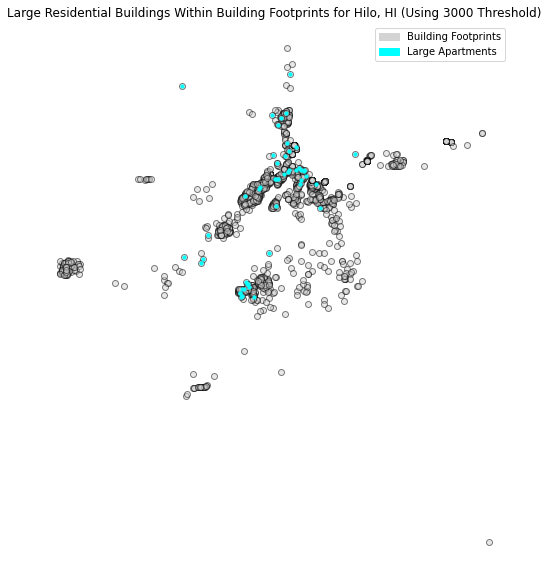

In [825]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the building footprints
joined.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Building Footprints')

# Plot the locations of large apartments
large_apartments_gdf.plot(ax=ax, color='cyan', markersize=10, label='Large Apartments')

# Create custom patches
building_patch = mpatches.Patch(color='lightgrey', label='Building Footprints')
apartment_patch = mpatches.Patch(color='cyan', label='Large Apartments')

# Add the custom patches to the legend
ax.legend(handles=[building_patch, apartment_patch])

# Add axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a title
ax.set_title('Large Residential Buildings Within Building Footprints for Hilo, HI (Using 3000 Threshold)')

# Optional: remove the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()

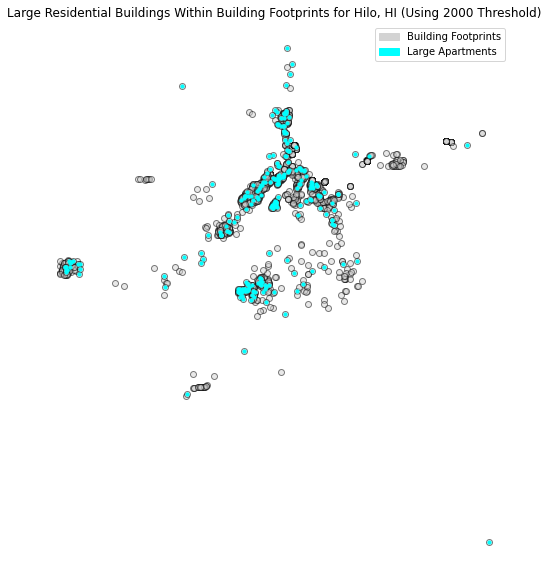

In [826]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the building footprints
joined.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Building Footprints')

# Plot the locations of large apartments
large_apartments_gdf_2.plot(ax=ax, color='cyan', markersize=10, label='Large Apartments')

# Create custom patches
building_patch = mpatches.Patch(color='lightgrey', label='Building Footprints')
apartment_patch = mpatches.Patch(color='cyan', label='Large Apartments')

# Add the custom patches to the legend
ax.legend(handles=[building_patch, apartment_patch])

# Add axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a title
ax.set_title('Large Residential Buildings Within Building Footprints for Hilo, HI (Using 2000 Threshold)')

# Optional: remove the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()

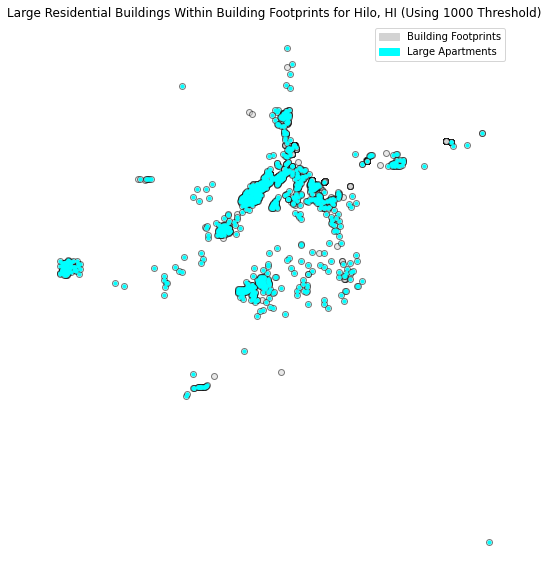

In [827]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the building footprints
joined.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='Building Footprints')

# Plot the locations of large apartments
large_apartments_gdf_3.plot(ax=ax, color='cyan', markersize=10, label='Large Apartments')

# Create custom patches
building_patch = mpatches.Patch(color='lightgrey', label='Building Footprints')
apartment_patch = mpatches.Patch(color='cyan', label='Large Apartments')

# Add the custom patches to the legend
ax.legend(handles=[building_patch, apartment_patch])

# Add axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a title
ax.set_title('Large Residential Buildings Within Building Footprints for Hilo, HI (Using 1000 Threshold)')

# Optional: remove the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()

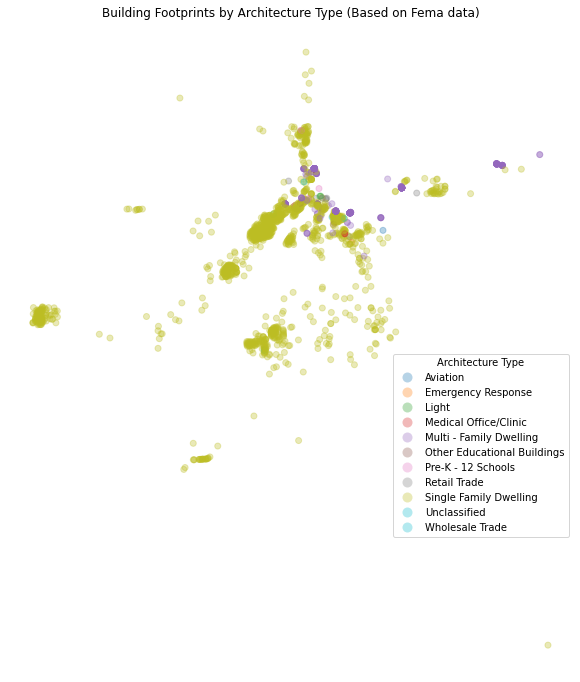

In [828]:
# Plot using different colors for different architecture types
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
joined.plot(column='PRIM_OCC', ax=ax, legend=True, alpha=0.32)

# Customize the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))
leg.set_title('Architecture Type')

# Set axis labels (if applicable)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a title
ax.set_title('Building Footprints by Architecture Type (Based on Fema data)')

# Remove the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()

In [829]:
# Extract 'architectureType' from the 'features' dictionaries into a new column
joined_drop_features = joined.dropna(subset=['features'])
joined_drop_features['architectureType'] = joined_drop_features['features'].apply(lambda x: x.get('architectureType', None))


/Users/kd6801/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


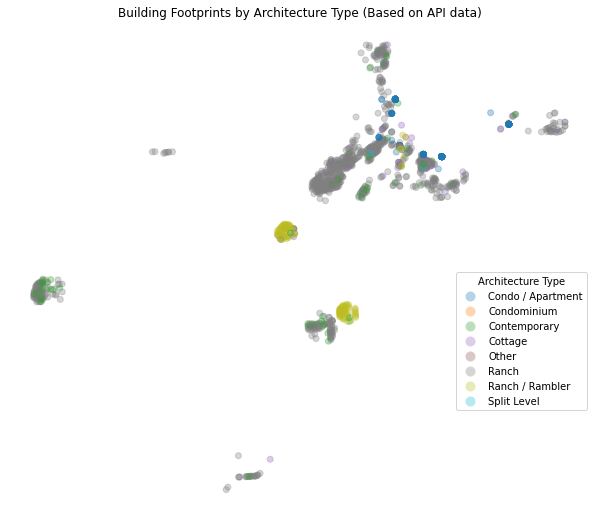

In [830]:
# Plot using different colors for different architecture types, based on API data
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
joined_drop_features.plot(column='architectureType', ax=ax, legend=True, alpha=0.32)

# Customize the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))
leg.set_title('Architecture Type')

# Set axis labels (if applicable)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a title
ax.set_title('Building Footprints by Architecture Type (Based on API data)')

# Remove the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()

### We see that
- It seems that most large apartments are associated with certain building footprints, perhaps indicating that larger buildings or complexes are more likely to contain larger apartments.
- The large apartments are not uniformly distributed; instead, they appear to be concentrated in specific areas. This could indicate neighborhoods or zones within the city where larger apartments are more common.
- There are clusters of large apartments, which could suggest high-rise residential areas or luxury apartment complexes.

To understand the context of these large apartments better, I might want to: 
1. compare them against various socioeconomic factors like median income, property values, or rental prices in those areas.

2. Investigating the proximity to amenities, public transport, and green spaces could also provide insights into the planning and desirability of these areas.


### Investigating whether the RentCast API 'squareFootage' informatio is consistent with the FEMA 'SQFEET' and 'SQMETERS'

In [831]:
joined.iloc[11]['features']

{'architectureType': 'Condo / Apartment', 'floorCount': 1, 'unitCount': 1}

In [832]:
joined.iloc[100]
#joined.iloc[20]['features']

id                             101-Aupuni-St,-Apt-402,-Hilo,-HI-96720
formattedAddress               101 Aupuni St, Apt 402, Hilo, HI 96720
addressLine1                                            101 Aupuni St
addressLine2                                                  Apt 402
city                                                             Hilo
state                                                              HI
zipCode                                                         96720
county                                                         Hawaii
latitude                                                    19.717542
longitude                                                 -155.076647
propertyType                                                    Condo
squareFootage                                                   958.0
lotSize                                                           NaN
yearBuilt                                                      1971.0
assessorID          

In [833]:
#joined.iloc[2]

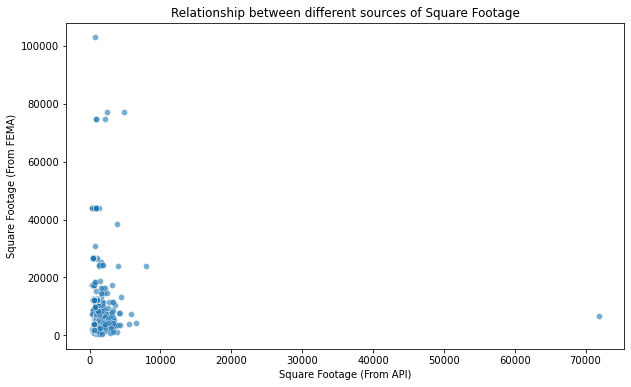

In [834]:
# Previously, we have filtered out entries that do not have squareFootage and SQFEET
# We want to further filter out those that do not have SQEMETERS
joined = joined.dropna(subset=['squareFootage','SQFEET','SQMETERS','features'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=joined, x='squareFootage', y='SQFEET', alpha=0.6)
plt.title('Relationship between different sources of Square Footage')
plt.xlabel('Square Footage (From API)')
plt.ylabel('Square Footage (From FEMA)')
plt.show()

In [835]:
correlation_sq = joined['squareFootage'].corr(joined['SQFEET'])
print(f'Pearson correlation coefficient between API Square Feet and that of FEMA: {correlation_sq:.2f}')

Pearson correlation coefficient between API Square Feet and that of FEMA: -0.12


### WE DON'T SEE STRONG CORRELATIONS


In [836]:

# What if we multipli the API square footage by unit count, and try to visualize again?
joined = joined[
    joined['features'].apply(lambda x: isinstance(x, dict) and 'unitCount' in x)
]
# Add the unitCount column
joined['unitCount'] = joined['features'].apply(lambda x: x.get('unitCount'))

In [837]:
# Add unit_times_area column
joined['unit_times_area'] = joined['squareFootage'] * joined['unitCount']

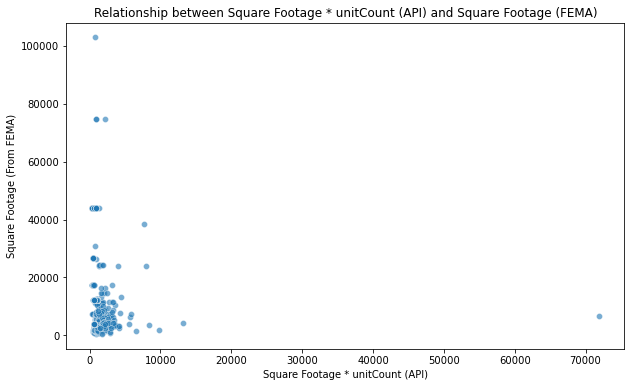

In [838]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=joined, x='unit_times_area', y='SQFEET', alpha=0.6)
plt.title('Relationship between Square Footage * unitCount (API) and Square Footage (FEMA)')
plt.xlabel('Square Footage * unitCount (API)')
plt.ylabel('Square Footage (From FEMA)')
plt.show()

In [839]:
correlation_sq2 = joined['unit_times_area'].corr(joined['SQFEET'])
print(f'Pearson correlation coefficient between unit_times_area and that of FEMA: {correlation_sq2:.2f}')

Pearson correlation coefficient between unit_times_area and that of FEMA: -0.07


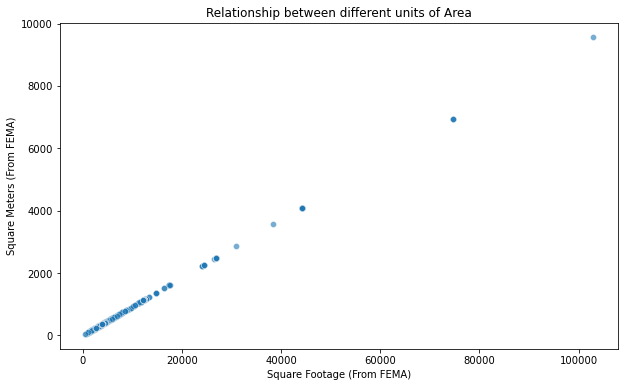

In [840]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=joined, x='SQFEET', y='SQMETERS', alpha=0.6)
plt.title('Relationship between different units of Area')
plt.xlabel('Square Footage (From FEMA)')
plt.ylabel('Square Meters (From FEMA)')
plt.show()

### We see correlation of 1, which indicates perfect collinearity.

In [841]:
#joined = gpd.sjoin(gdf_api, gdf, how="inner", op='intersects')

In [842]:
#joined = joined.dropna(subset=['HEIGHT'])
#print(len(joined))


### Unfortunately, the height column contains all NA for Hilo. Therefore, we cannot calculate number of floors for these buildings

In [843]:
# Define the average unit area based on the building type
average_unit_area_single_family = 2299
average_unit_area_other = 1046
print(f"The total number of buildings pulled from the FEMA dataset in the state of HI is {len(gdf)}")
print(f"The total number of buildings pulled from the RentCast API is {len(Hilo_api)}")
print("We can filter out the residential buildings only in Hilo,HI by applying intersection.")
print(f"The total number of buildings contained in both FEMA and API is {len(joined)}")

The total number of buildings pulled from the FEMA dataset in the state of HI is 374703
The total number of buildings pulled from the RentCast API is 3785
We can filter out the residential buildings only in Hilo,HI by applying intersection.
The total number of buildings contained in both FEMA and API is 1269


In [844]:
# Drop those contain na in these features
joined = joined.dropna(subset=['squareFootage','SQFEET','SQMETERS','PRIM_OCC'])
print(f"After dropping off the relevant columns, we see that there are still {len(joined)} entries available to us")

After dropping off the relevant columns, we see that there are still 1269 entries available to us


In [845]:
#joined.iloc[200].features

In [846]:
def calculate_units(row):
    """
    Calculate the estimated number of units in a building based on its square footage and property type.

    Parameters:
    - row (pd.Series): A pandas Series representing a row of a DataFrame, expected to contain
                       the building's property type and its total square footage.

    Returns:
    - float or None: The estimated number of units in the building if the property type is recognized
                     and square footage is available. Returns None if the property type is not recognized
                     or square footage is missing.
    
    The function uses predefined average unit areas for different property types to estimate the number of units.
    If the property type is not in the predefined list or the square footage is not provided, the function returns None.
    """
    # Define average areas based on the building type
    average_unit_areas = {
        'Single Family': 2299,
        'Multifamily': 1046,
        'Condo': 592,
        'Apartment': 592,
        'Townhouse': 592,
        'Manufactured': 2000,
        'Land': 2000
        
    }
    
    # Get the building type from the row
    building_type = row.get('propertyType')
    
    # Look up the average area for the building type
    average_area = average_unit_areas.get(building_type, None)
    
    # Proceed only if the average area is found and 'Squarefeet' is valid
    if average_area is not None and 'SQFEET' in row and row['SQFEET'] is not None:
        return row['SQFEET'] / average_area
    else:
        return None

# Apply the function to each row of the DataFrame to create the new column
joined['number_of_units'] = joined.apply(calculate_units, axis=1)

In [847]:
#joined_drop_features['height'] = joined_drop_features['features'].apply(lambda x: x.get('architectureType', None))

In [848]:
# Calculate the number of entries with 'number_of_units' greater than 40
number_of_entries_over_40_units = (joined['number_of_units'] > 40).sum()

# Print the result
print(f"We see that after filtering, out of {len(joined)}, we have {number_of_entries_over_40_units} buildings that exceed 40 unites")

We see that after filtering, out of 1269, we have 67 buildings that exceed 40 unites


In [849]:
#!pip install pyarrow
import pyarrow as pa
import pyarrow.parquet as pq

In [850]:
path_to_hilo_parquet = "/Users/kd6801/Desktop/foot-traffic/hilo_full_patterns.parquet"
foot_traffic_data =  pd.read_parquet(path_to_hilo_parquet, engine='pyarrow')

# read it as a parquet file
#parquet_file = pq.ParquetFile(path_to_hilo_parquet)

In [851]:
# Print the schema of the Parquet file
#print(parquet_file.schema)


In [852]:
# List column names and types
#for column in parquet_file.schema:
#    print(column.name, column.physical_type)

In [853]:
#geo_parquet_df

### We want to conduct the joined geojson data's correlation with the foot traffic data with visualization

In [854]:
# Ensure latitude and longitude are correctly formatted and not null
print(foot_traffic_data[['latitude', 'longitude']].describe())

           latitude     longitude
count  45290.000000  45290.000000
mean      19.711862   -155.076886
std        0.015871      0.019507
min       19.549075   -155.328179
25%       19.703146   -155.086631
50%       19.715916   -155.076533
75%       19.722954   -155.064939
max       19.756069   -155.009353


In [855]:
# Since don't have a geometry column, we create the column in the geopandas data imported from the parquet file.
foot_traffic_data['geometry'] = foot_traffic_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
geo_parquet_df = gpd.GeoDataFrame(foot_traffic_data, geometry='geometry')

geo_parquet_df['geometry']
# We see that we have successfully created the geometry column

2353      POINT (-155.08010 19.70508)
3153      POINT (-155.07606 19.71020)
3422      POINT (-155.08442 19.72112)
4179      POINT (-155.06679 19.71683)
9436      POINT (-155.07924 19.71864)
                     ...             
506689    POINT (-155.08754 19.72450)
507478    POINT (-155.08784 19.72541)
514153    POINT (-155.04170 19.71885)
534386    POINT (-155.07592 19.71066)
540183    POINT (-155.08884 19.72229)
Name: geometry, Length: 47954, dtype: geometry

In [856]:
joined['geometry']

1       POINT (-155.08394 19.71986)
2       POINT (-155.08475 19.72204)
4       POINT (-155.08483 19.72184)
225     POINT (-155.08451 19.72220)
3       POINT (-155.08555 19.71934)
                   ...             
3469    POINT (-155.08970 19.72817)
3470    POINT (-155.08970 19.72817)
3472    POINT (-155.08970 19.72817)
3473    POINT (-155.08970 19.72817)
3628    POINT (-155.09998 19.71883)
Name: geometry, Length: 1269, dtype: geometry

In [857]:
# Rename columns in both dataframes if they exist
if 'index_left' in joined.columns:
    joined.rename(columns={'index_left': 'index_left_old'}, inplace=True)
if 'index_right' in joined.columns:
    joined.rename(columns={'index_right': 'index_right_old'}, inplace=True)
if 'index_left' in geo_parquet_df.columns:
    geo_parquet_df.rename(columns={'index_left': 'index_left_old'}, inplace=True)
if 'index_right' in geo_parquet_df.columns:
    geo_parquet_df.rename(columns={'index_right': 'index_right_old'}, inplace=True)


In [858]:
#len(merged_df)

In [859]:
# Now we make sure they use the same CRS
print(f"CRS for geoParquet dataframe is {geo_parquet_df.crs}")
print(f"CRS for joined dataframe is {joined.crs}")
geo_parquet_df = geo_parquet_df.set_crs(joined.crs, allow_override=True)
print(f"After alignment,CRS for geoParquet dataframe is {geo_parquet_df.crs}")
print(f"After alignment,CRS for joined dataframe is {joined.crs}")

print(f"There are in total {len(geo_parquet_df)} entries in the foot traffic data")

CRS for geoParquet dataframe is None
CRS for joined dataframe is EPSG:4326
After alignment,CRS for geoParquet dataframe is EPSG:4326
After alignment,CRS for joined dataframe is EPSG:4326
There are in total 47954 entries in the foot traffic data


In [860]:
# Check for and drop any geometries that are None or contain NaN coordinates
geo_parquet_df = geo_parquet_df[geo_parquet_df.geometry.notna()]
joined = joined[joined.geometry.notna()]
# Remove any geometries that are invalid
geo_parquet_df = geo_parquet_df[geo_parquet_df.geometry.is_valid]
joined = joined[joined.geometry.is_valid]

In [861]:
# Merge the two datasets
intersect_foot_geo = gpd.sjoin(geo_parquet_df,joined, how="inner", op='intersects')


/Users/kd6801/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [862]:

intersections = gpd.sjoin(geo_parquet_df,joined, how="inner", op='intersects', predicate='intersects')

/Users/kd6801/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [863]:
# Check if there are any intersections
print("Number of intersections found:", len(intersections))

Number of intersections found: 0


#### Since we found 0 intersections when doing exact matching, we need to add buffer. Since we are using EPSG=4326, to convert degree into meters(to approximate a buffer of 10 meters in degrees):
- One degree of latitude is approximately 111 kilometers (or about 111,000 meters).
- One degree of longitude is also approximately 111 kilometers at the equator.

In [864]:
# Simple buffer
# buffer_size = 10/110000
# geo_parquet_df['geometry'] = geo_parquet_df.geometry.buffer(buffer_size)

In [865]:
from shapely.geometry import Point, Polygon
from pyproj import Proj, Transformer

# Define projections
proj_wgs84 = Proj(proj='latlong', datum='WGS84')
proj_utm = Proj(proj="utm", zone=5, datum='WGS84')  # Adjust zone

# Create a transformer
transformer_to_utm = Transformer.from_proj(proj_wgs84, proj_utm, always_xy=True)
transformer_to_wgs84 = Transformer.from_proj(proj_utm, proj_wgs84, always_xy=True)

def buffer_in_meters(lon, lat, meters):
    """
    Buffer a geographic point defined in latitude and longitude by a specified distance in meters,
    transforming it to UTM coordinates for buffering, then converting back to WGS84.

    Parameters:
    - lon (float): Longitude of the point in decimal degrees.
    - lat (float): Latitude of the point in decimal degrees.
    - meters (float): The buffer distance in meters.

    Returns:
    - shapely.geometry.polygon.Polygon or None: A polygon representing the buffered area around the point in WGS84 coordinates.
      Returns None if the buffered polygon is empty.

    The function performs coordinate transformations to UTM for accurate distance measurement, buffers the point, and 
    then transforms the buffered polygon's coordinates back to WGS84 for compatibility with geographic applications. This method 
    ensures more accurate distance calculations than buffering directly in geographic coordinates.
    """
    # Transform point to UTM
    x, y = transformer_to_utm.transform(lon, lat)
    
    # Create point and buffer in UTM
    point_utm = Point(x, y)
    buffered_point_utm = point_utm.buffer(meters)
    
    # Convert buffered polygon to WGS84
    if buffered_point_utm.is_empty:
        return None
    else:
        exterior_coords = [(x, y) for x, y in zip(*buffered_point_utm.exterior.coords.xy)]
        transformed_coords = [transformer_to_wgs84.transform(x, y) for x, y in exterior_coords]
        polygon_wgs84 = Polygon(transformed_coords)
        return polygon_wgs84


In [ ]:
# Call the above function
geo_parquet_df['geometry'] = geo_parquet_df.apply(
    lambda row: buffer_in_meters(row['longitude'], row['latitude'], 10), axis=1)

In [866]:
# Perform the spatial join
intersect_foot_geo = gpd.sjoin(joined, geo_parquet_df, how="left", op='intersects')

/Users/kd6801/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [867]:
# Check results
print("Number of intersections found after buffering and cleaning:", len(intersect_foot_geo))

Number of intersections found after buffering and cleaning: 7087


In [868]:
# Here are the variables contained in the parquet/ footprint dataset.
geo_parquet_df.iloc[1]

placekey                                                   22d-222@bp4-jct-f75
safegraph_place_id                         sg:e170329441704027b328f7603705729f
parent_placekey                                            228-222@bp4-jct-hkf
parent_safegraph_place_id                  sg:d4f8d56cb61345e6b33a5a1382a503d7
location_name                                  Happy Valley Seafood Restaurant
safegraph_brand_ids                                                       None
brands                                                                    None
top_category                               Restaurants and Other Eating Places
sub_category                                          Full-Service Restaurants
category_tags                                                     Chinese Food
naics_code                                                            722511.0
latitude                                                             19.710198
longitude                                           

In [869]:
# Here are the variables contained in the joined dataset
joined.iloc[1]

id                                    98-Ponahawai-St,-Hilo,-HI-96720
formattedAddress                      98 Ponahawai St, Hilo, HI 96720
addressLine1                                          98 Ponahawai St
addressLine2                                                     None
city                                                             Hilo
state                                                              HI
zipCode                                                         96720
county                                                         Hawaii
latitude                                                    19.722039
longitude                                                 -155.084752
propertyType                                                Apartment
squareFootage                                                  3942.0
lotSize                                                        4574.0
yearBuilt                                                      1919.0
assessorID          

In [870]:
intersect_foot_geo.iloc[1000]

id                      101-Aupuni-St,-Ste-118,-Hilo,-HI-96720
formattedAddress        101 Aupuni St, Ste 118, Hilo, HI 96720
addressLine1                                     101 Aupuni St
addressLine2                                           Ste 118
city_left                                                 Hilo
                                         ...                  
popularity_by_hour                                        None
popularity_by_day                                         None
device_type                                               None
poi_cbg                                                    NaN
visitor_daytime_cbgs                                      None
Name: 37, Length: 102, dtype: object

In [871]:
#intersect_foot_geo.tail(40)

In [881]:
# Ensure all relevant columns are numeric and handle any possible missing values
cols_to_analyze = ['raw_visit_counts', 'raw_visitor_counts', 'SQFEET', 'number_of_units',]
intersect_foot_geo[cols_to_analyze] = intersect_foot_geo[cols_to_analyze].apply(pd.to_numeric, errors='coerce')

# Create dummy variables for the categorical property type
# property_types = pd.get_dummies(intersect_foot_geo['propertyType'], drop_first=True)  # drop_first to avoid multicollinearity

# intersect_foot_geo.dropna(subset=cols_to_analyze, inplace=True)

# # Drop the original 'propertyType' column and any rows with NaN values in the cols_to_analyze
# intersect_foot_geo.drop(columns=['propertyType'], inplace=True)  # Drop the original categorical column if we no longer need it
# intersect_foot_geo = pd.concat([intersect_foot_geo, property_types], axis=1)  # Concatenate the dummy variables

# # Drop rows with NaN values in the initially specified columns
# intersect_foot_geo.dropna(subset=cols_to_analyze, inplace=True)

In [874]:
# check if there are any duplicate index
# Check if there are any duplicate index values
if intersect_foot_geo.index.duplicated().any():
    print("Duplicate indexes found!")
    # Displaying the duplicate indexes
    print(intersect_foot_geo[intersect_foot_geo.index.duplicated(keep=False)])
else:
    print("No duplicate indexes.")


Duplicate indexes found!
                                          id  \
22    101-Aupuni-St,-Ste-158,-Hilo,-HI-96720   
22    101-Aupuni-St,-Ste-158,-Hilo,-HI-96720   
22    101-Aupuni-St,-Ste-158,-Hilo,-HI-96720   
22    101-Aupuni-St,-Ste-158,-Hilo,-HI-96720   
22    101-Aupuni-St,-Ste-158,-Hilo,-HI-96720   
...                                      ...   
2961           121-Banyan-Dr,-Hilo,-HI-96720   
2961           121-Banyan-Dr,-Hilo,-HI-96720   
2961           121-Banyan-Dr,-Hilo,-HI-96720   
2961           121-Banyan-Dr,-Hilo,-HI-96720   
2961           121-Banyan-Dr,-Hilo,-HI-96720   

                            formattedAddress   addressLine1 addressLine2  \
22    101 Aupuni St, Ste 158, Hilo, HI 96720  101 Aupuni St      Ste 158   
22    101 Aupuni St, Ste 158, Hilo, HI 96720  101 Aupuni St      Ste 158   
22    101 Aupuni St, Ste 158, Hilo, HI 96720  101 Aupuni St      Ste 158   
22    101 Aupuni St, Ste 158, Hilo, HI 96720  101 Aupuni St      Ste 158   
22    101 Aupuni S

In [ ]:
# # Aggregate the data by address or ID, calculating mean for numeric and mode for categorical
# aggregated_df = intersect_foot_geo.groupby('id').agg({
#     'latitude_left': 'first',    # Assuming latitude and longitude don't change
#     'longitude_left': 'first',
#     'raw_visit_counts': 'sum',   # Summing visits might make sense
#     'raw_visitor_counts': 'sum',
#     'SQFEET': 'first',           # Assuming square footage is constant per location
#     #'propertyType': lambda x: x.mode()[0] if not x.empty else np.nan,  # Most common property type
#     # Include other relevant fields
# }).reset_index()


In [875]:
# Check unique entries by specific columns that should be unique
unique_columns = ['id', 'formattedAddress', 'latitude_left', 'longitude_left']
duplicates_detail = intersect_foot_geo[intersect_foot_geo.duplicated(subset=unique_columns, keep=False)]
print(duplicates_detail.sort_values(by=unique_columns))

                                             id  \
3527     101-Aupuni-St,-Apt-421,-Hilo,-HI-96720   
3527     101-Aupuni-St,-Apt-421,-Hilo,-HI-96720   
3527     101-Aupuni-St,-Apt-421,-Hilo,-HI-96720   
3527     101-Aupuni-St,-Apt-421,-Hilo,-HI-96720   
3527     101-Aupuni-St,-Apt-421,-Hilo,-HI-96720   
...                                         ...   
1156  671-Waianuenue-Ave-Bldg-A,-Hilo,-HI-96720   
1156  671-Waianuenue-Ave-Bldg-A,-Hilo,-HI-96720   
1156  671-Waianuenue-Ave-Bldg-A,-Hilo,-HI-96720   
1156  671-Waianuenue-Ave-Bldg-A,-Hilo,-HI-96720   
1156  671-Waianuenue-Ave-Bldg-A,-Hilo,-HI-96720   

                               formattedAddress               addressLine1  \
3527     101 Aupuni St, Apt 421, Hilo, HI 96720              101 Aupuni St   
3527     101 Aupuni St, Apt 421, Hilo, HI 96720              101 Aupuni St   
3527     101 Aupuni St, Apt 421, Hilo, HI 96720              101 Aupuni St   
3527     101 Aupuni St, Apt 421, Hilo, HI 96720              101 Aupuni St 

In [ ]:
# Remove duplicates, keeping the first occurrence
# intersect_foot_geo = intersect_foot_geo[~intersect_foot_geo.index.duplicated(keep='first')]


In [876]:
len(intersect_foot_geo)
intersect_foot_geo = intersect_foot_geo.reset_index(drop=True)
intersect_foot_geo = intersect_foot_geo[~intersect_foot_geo.index.duplicated(keep='first')]

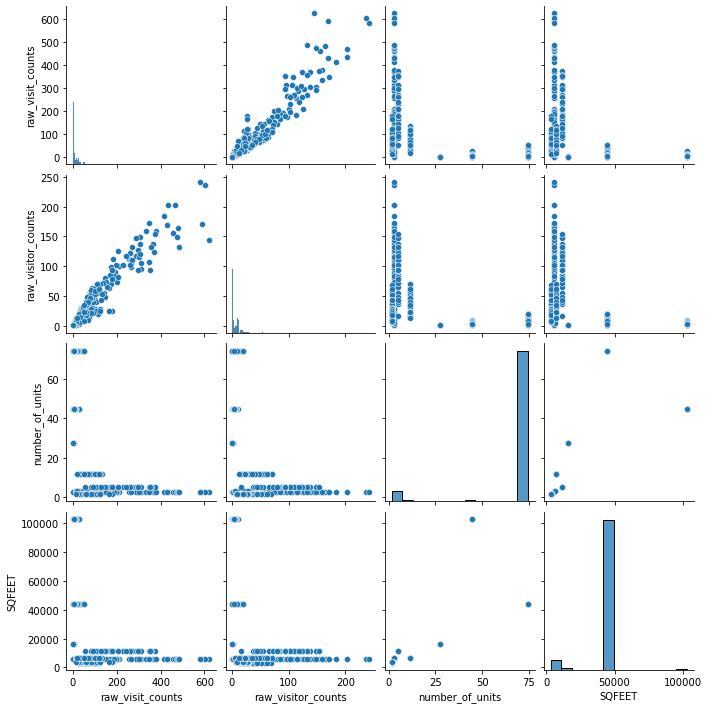

In [877]:
# Select only numeric columns for pair plot (excluding dummy variables for simplicity)
cols_to_analyze = ['raw_visit_counts', 'raw_visitor_counts', 'number_of_units','SQFEET']
sns.pairplot(intersect_foot_geo[cols_to_analyze])
plt.show()

The pair plot provides a visual summary of the pairwise relationships and distributions of four key variables: `raw_visit_counts`, `raw_visitor_counts`, `number_of_units`, and `SQFEET`.

From the scatter plots, we can observe the following relationships between variables:
- `raw_visit_counts` and `raw_visitor_counts` seem to have a positive linear relationship, suggesting that places with more visits also tend to have more unique visitors.
- `number_of_units` does not show a clear relationship with either `raw_visit_counts` or `raw_visitor_counts`, indicating that the number of units in a building doesn't strongly affect the visit or visitor counts in a linear way.
- `SQFEET` shows some degree of positive association with `raw_visit_counts`, which might indicate that larger areas tend to have more visits.
- `SQFEET` does not show a clear linear relationship with `number_of_units`, suggesting that larger square footage doesn't necessarily mean a greater number of units. This could be due to the presence of buildings with large common areas or facilities.

The histograms along the diagonal provide insights into the distribution of individual variables:
- `raw_visit_counts` and `raw_visitor_counts` have skewed distributions with long tails to the right, indicating a few locations with exceptionally high visit or visitor counts.
- `number_of_units` is heavily concentrated at lower values with very few locations having a high number of units, which suggests most buildings in the dataset are smaller in unit count.
- `SQFEET` also has a right-skewed distribution with most buildings having lower square footage and a few much larger outliers.

Overall, the plot suggests that while there are some relationships between the size of a building and visitation patterns, the number of units is less clearly related to these factors, and there are indications of a few unusual data points that may require further investigation.

In [883]:
# g = sns.FacetGrid(intersect_foot_geo, col='propertyType', col_wrap=4, height=3.5)
# g = g.map(plt.hist, 'SQFEET')
# plt.show()

In [884]:
print(intersect_foot_geo.iloc[100]['formattedAddress'])
print(intersect_foot_geo.iloc[100]['street_address'])
print("we see that they are indeed located in a close area")

101 Aupuni St, Ste 320, Hilo, HI 96720
101 Aupuni St Ste 239


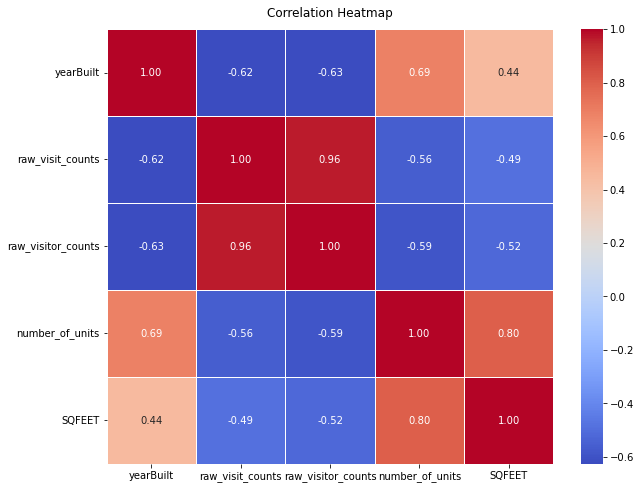

In [889]:
import seaborn as sns
import matplotlib.pyplot as plt
cols_to_analyze2= ['yearBuilt', 'raw_visit_counts', 'raw_visitor_counts', 'number_of_units','SQFEET']
correlation_matrix = intersect_foot_geo[cols_to_analyze2].corr()
# Create a heatmap from the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as needed
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()


#### If we want to include these 9 variables for correlation, we need to further pre-process the data.

In [ ]:
# import pandas as pd

# # Example of converting columns to numeric, handling special cases
# numeric_cols = ['squareFootage', 'raw_visit_counts', 'raw_visitor_counts', 'median_dwell', 'LATITUDE', 'LONGITUDE', 'yearBuilt']
# intersect_foot_geo[numeric_cols] = intersect_foot_geo[numeric_cols].apply(pd.to_numeric, errors='coerce')

# # Assuming 'taxAssessments' needs to be extracted from a dictionary
# intersect_foot_geo['tax_value'] = intersect_foot_geo['taxAssessments'].apply(lambda x: x.get('2020', {}).get('value') if pd.notna(x) else None)
# intersect_foot_geo['tax_value'] = pd.to_numeric(intersect_foot_geo['tax_value'], errors='coerce')

# # Property taxes could also be nested or need extraction
# intersect_foot_geo['property_taxes'] = intersect_foot_geo['propertyTaxes'].apply(lambda x: x.get('2020', {}).get('total') if pd.notna(x) else None)
# intersect_foot_geo['property_taxes'] = pd.to_numeric(intersect_foot_geo['property_taxes'], errors='coerce')


In [ ]:
# # Convert 'propertyType' into dummy variables
# property_dummies = pd.get_dummies(intersect_foot_geo['propertyType'], prefix='type')
# intersect_foot_geo = pd.concat([intersect_foot_geo, property_dummies], axis=1)


In [ ]:
# # Update the list of columns to include for analysis, adding new dummy variable columns and the extracted tax columns
# analysis_cols = numeric_cols + ['unitCount', 'tax_value', 'property_taxes'] + list(property_dummies.columns)


In [ ]:
# intersect_foot_geo.dropna(subset=analysis_cols, inplace=True)  # Ensures no NaN values in the columns of interest


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Compute the correlation matrix
# correlation_matrix = intersect_foot_geo[analysis_cols].corr()

# # Plot the heatmap
# plt.figure(figsize=(14, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix for Residential Buildings')
# plt.show()


In [ ]:
# #Pulling Apartment data from the API for Hilo, HI

# import requests

# url_Hilo_apartment= "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Apartment&limit=500"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_apartment = requests.get(url_Hilo_apartment, headers=headers).json()

In [ ]:
# len(response_apartment)

In [ ]:
# #Pulling Single family category residential data from the API for Hilo, HI
# import requests

# url_Hilo_single = "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Single%20Family&limit=500"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_single = requests.get(url_Hilo_single, headers=headers).json()
# len(response_single)

In [ ]:
# #Pulling Single family category residential data from the API for Hilo, HI
# import requests

# url_Hilo_single2 = "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Single%20Family&limit=500&offset=501"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_single2 = requests.get(url_Hilo_single2, headers=headers).json()
# len(response_single2)

In [ ]:
# #Pulling Single family category residential data from the API for Hilo, HI
# import requests

# url_Hilo_single3 = "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Single%20Family&limit=500&offset=1001"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_single3 = requests.get(url_Hilo_single3, headers=headers).json()
# len(response_single3)

In [ ]:
# #Pulling Single family category residential data from the API for Hilo, HI
# import requests

# url_Hilo_single4 = "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Single%20Family&limit=500&offset=1501"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_single4 = requests.get(url_Hilo_single4, headers=headers).json()
# len(response_single4)

In [ ]:
# #Pulling Single family category residential data from the API for Hilo, HI
# import requests

# url_Hilo_single5 = "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Single%20Family&limit=500&offset=2001"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_single5 = requests.get(url_Hilo_single5, headers=headers).json()
# len(response_single5)

In [ ]:
# #Pulling Single family category residential data from the API for Hilo, HI
# import requests

# url_Hilo_single6 = "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Single%20Family&limit=500&offset=2501"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_single6 = requests.get(url_Hilo_single6, headers=headers).json()
# len(response_single6)

In [ ]:
# # Combined Single family data
# combined_response_single = response_single+response_single2+response_single3+response_single4+response_single5+response_single6

In [ ]:
# len(combined_response_single)

In [ ]:
# #condo
# import requests

# url_condo = "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Condo&limit=500"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_condo = requests.get(url_condo, headers=headers).json()
# len(response_condo)

In [ ]:
# #condo
# import requests

# url_condo2 = "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Condo&limit=500&offset=501"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_condo2 = requests.get(url_condo2, headers=headers).json()
# len(response_condo2)

In [ ]:
# combined_condo = response_condo+response_condo2
# len(combined_condo)

In [ ]:
# # Townhouse
# import requests

# url_townhouse = "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Townhouse&limit=500"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_townhouse = requests.get(url_townhouse, headers=headers).json()
# len(response_townhouse)

In [ ]:
# # Multifamily
# import requests

# url_multifamily = "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Multi-Family&limit=500"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_multifamily = requests.get(url_multifamily, headers=headers).json()

# len(response_multifamily)

In [ ]:
# # land
# import requests

# url_land = "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Land&limit=500"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_land = requests.get(url_land, headers=headers).json()

# len(response_land)


In [ ]:
# #Manufactured
# import requests

# url_manu = "https://api.rentcast.io/v1/properties?city=Hilo&state=HI&propertyType=Manufactured&limit=500"

# headers = {
#     "accept": "application/json",
#     "X-Api-Key": "889bfd9166f14faa853a08628f388dbb"
# }

# response_manu = requests.get(url_manu, headers=headers).json()

# len(response_manu)
# # NOTHING in this category

In [ ]:
# # Save apartmentsa
# import json
# with open('Hilo_apartment.json', 'w') as file:
#     json.dump(response_apartment, file, indent=4)

In [ ]:
# with open('Hilo_single.json', 'w') as file:
#     json.dump(combined_response_single, file, indent=4)

In [ ]:
# with open('Hilo_condo.json', 'w') as file:
#     json.dump(combined_condo, file, indent=4)

In [ ]:
# with open('Hilo_townhouse.json', 'w') as file:
#     json.dump(response_townhouse, file, indent=4)

In [ ]:
# with open('Hilo_land.json', 'w') as file:
#     json.dump(response_land, file, indent=4)

In [ ]:
# with open('Hilo_multifamily.json', 'w') as file:
#     json.dump(response_multifamily, file, indent=4)

In [ ]:
# Hilo_all = response_apartment+combined_response_single+combined_condo+response_townhouse+response_land+response_multifamily

In [ ]:
# with open('Hilo_all.json', 'w') as file:
#     json.dump(Hilo_all, file, indent=4)